# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [1]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 17.1 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 67.7.2
    Uninstalling setuptools-67.7.2:
      Successfully uninstalled setuptools-67.7.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 129.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080019 sha256=4d25843abf365c8af78c7ee1e4eebf7ba950a6e281b0834ba019b30233a9728c
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.20.1
    Uninstalling graphviz-0.20.1:
      Successfully uninstalled graphviz-0.20.1
  Attempting uninstall: bokeh
    Found existing installation: bokeh 2.4.3
    Uninstalling bokeh-2.4.3:
      Successfully uninstalled bokeh-2.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

### Setup Kaggle API Key

In [2]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [3]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "segunabiola"
kaggle_key = "e23178595e9cf99a4b668d57d3f6aa70"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [4]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0% 0.00/189k [00:00<?, ?B/s]
100% 189k/189k [00:00<00:00, 55.8MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [5]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [6]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv("train.csv")
train.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [7]:
# Information regarding datatypes of variables within the train
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe().T

count        mean         std   min      25%      50%       75%  \
season      10886.0    2.506614    1.116174  1.00   2.0000    3.000    4.0000   
holiday     10886.0    0.028569    0.166599  0.00   0.0000    0.000    0.0000   
workingday  10886.0    0.680875    0.466159  0.00   0.0000    1.000    1.0000   
weather     10886.0    1.418427    0.633839  1.00   1.0000    1.000    2.0000   
temp        10886.0   20.230860    7.791590  0.82  13.9400   20.500   26.2400   
atemp       10886.0   23.655084    8.474601  0.76  16.6650   24.240   31.0600   
humidity    10886.0   61.886460   19.245033  0.00  47.0000   62.000   77.0000   
windspeed   10886.0   12.799395    8.164537  0.00   7.0015   12.998   16.9979   
casual      10886.0   36.021955   49.960477  0.00   4.0000   17.000   49.0000   
registered  10886.0  155.552177  151.039033  0.00  36.0000  118.000  222.0000   
count       10886.0  191.574132  181.144454  1.00  42.0000  145.000  284.0000   

                 max  
season        4.0000  
holiday       1.0000  
workingday    1.0000  
weather       4.0000  
temp         41.0000  
atemp        45.4550  
humidity    100.0000  
windspeed    56.9969  
casual      367.0000  
registered  886.0000  
count       977.0000

In [9]:
# Check for null values in train data
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [10]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv("test.csv")

test.head()

datetime  season  holiday  workingday  weather   temp   atemp  \
0  2011-01-20 00:00:00       1        0           1        1  10.66  11.365   
1  2011-01-20 01:00:00       1        0           1        1  10.66  13.635   
2  2011-01-20 02:00:00       1        0           1        1  10.66  13.635   
3  2011-01-20 03:00:00       1        0           1        1  10.66  12.880   
4  2011-01-20 04:00:00       1        0           1        1  10.66  12.880   

   humidity  windspeed  
0        56    26.0027  
1        56     0.0000  
2        56     0.0000  
3        56    11.0014  
4        56    11.0014

In [11]:
# Information regarding datatypes of variables within the train
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [12]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
test.describe()

season      holiday   workingday      weather         temp  \
count  6493.000000  6493.000000  6493.000000  6493.000000  6493.000000   
mean      2.493300     0.029108     0.685815     1.436778    20.620607   
std       1.091258     0.168123     0.464226     0.648390     8.059583   
min       1.000000     0.000000     0.000000     1.000000     0.820000   
25%       2.000000     0.000000     0.000000     1.000000    13.940000   
50%       3.000000     0.000000     1.000000     1.000000    21.320000   
75%       3.000000     0.000000     1.000000     2.000000    27.060000   
max       4.000000     1.000000     1.000000     4.000000    40.180000   

             atemp     humidity    windspeed  
count  6493.000000  6493.000000  6493.000000  
mean     24.012865    64.125212    12.631157  
std       8.782741    19.293391     8.250151  
min       0.000000    16.000000     0.000000  
25%      16.665000    49.000000     7.001500  
50%      25.000000    65.000000    11.001400  
75%      31.060000    81.000000    16.997900  
max      50.000000   100.000000    55.998600

In [13]:
# Check for null values in train data
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [14]:
# Dataset shape and size
print("Train Dataset Shape : ", train.shape)
print("Test Dataset Shape  : ", test.shape)

Train Dataset Shape :  (10886, 12)
Test Dataset Shape  :  (6493, 9)


In [15]:
# Same thing as train and test dataset
Submission = pd.read_csv("sampleSubmission.csv")
Submission.head()

datetime  count
0  2011-01-20 00:00:00      0
1  2011-01-20 01:00:00      0
2  2011-01-20 02:00:00      0
3  2011-01-20 03:00:00      0
4  2011-01-20 04:00:00      0

In [16]:
# Different between train and test using set
list (set(train.columns).difference(set(test.columns)))

['registered', 'count', 'casual']

## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [17]:
# Removing unnecessary columns adding neccessary parameters

eval_metric = 'root_mean_squared_error'
label = 'count'
ignored_columns = ["casual", "registered"]
train_data = train.drop(columns=ignored_columns)
time_limit = 600
presets = 'best_quality'


predictor = TabularPredictor(label=label, eval_metric=eval_metric)
predictor.fit(train_data, time_limit=time_limit, presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20230607_225706/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230607_225706/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == int and many unique label-values observed).
	Label info (max, min, mean, stddev): (977, 1, 191.57413, 181.14445)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during predictor init (You may specify problem_type as one of: ['binary', 'multiclass', 'regression'])
Using Fe

### Review AutoGluon's training run with ranking of models that did the best.

In [18]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.017440      14.053519  493.902531                0.000952           0.359330            3       True         14
1   RandomForestMSE_BAG_L2  -53.364563      13.517484  408.805403                0.760101          34.321264            2       True         12
2          LightGBM_BAG_L2  -55.053420      13.233578  400.183811                0.476195          25.699672            2       True         11
3          CatBoost_BAG_L2  -55.361771      12.816271  433.522265                0.058888          59.038127            2       True         13
4        LightGBMXT_BAG_L2  -60.526677      17.644255  423.524980                4.886872          49.040842            2       True         10
5    KNeighborsDist_BAG_L1  -84.125061       0.085284    0.056983         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54

In [19]:
# creating a leadership board

leaderboard = predictor.leaderboard(silent=True)
leaderboard_df = pd.DataFrame(leaderboard)
leaderboard_df

model   score_val  pred_time_val    fit_time  \
0      WeightedEnsemble_L3  -53.017440      14.053519  493.902531   
1   RandomForestMSE_BAG_L2  -53.364563      13.517484  408.805403   
2          LightGBM_BAG_L2  -55.053420      13.233578  400.183811   
3          CatBoost_BAG_L2  -55.361771      12.816271  433.522265   
4        LightGBMXT_BAG_L2  -60.526677      17.644255  423.524980   
5    KNeighborsDist_BAG_L1  -84.125061       0.085284    0.056983   
6      WeightedEnsemble_L2  -84.125061       0.086315    0.619022   
7    KNeighborsUnif_BAG_L1 -101.546199       0.046066    0.043732   
8   RandomForestMSE_BAG_L1 -116.548359       0.604878   12.385155   
9     ExtraTreesMSE_BAG_L1 -124.600676       0.595997    4.997904   
10         CatBoost_BAG_L1 -130.497056       0.086150  188.216088   
11         LightGBM_BAG_L1 -131.054162       1.215151   25.361281   
12       LightGBMXT_BAG_L1 -131.460909       9.394288   58.034603   
13  NeuralNetFastAI_BAG_L1 -137.193197       0.729569   85.388393   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000952           0.359330            3       True   
1                 0.760101          34.321264            2       True   
2                 0.476195          25.699672            2       True   
3                 0.058888          59.038127            2       True   
4                 4.886872          49.040842            2       True   
5                 0.085284           0.056983            1       True   
6                 0.001031           0.562039            2       True   
7                 0.046066           0.043732            1       True   
8                 0.604878          12.385155            1       True   
9                 0.595997           4.997904            1       True   
10                0.086150         188.216088            1       True   
11                1.215151          25.361281            1       True   
12                9.394288          58.034603            1       True   
13                0.729569          85.388393            1       True   

    fit_order  
0          14  
1          12  
2          11  
3          13  
4          10  
5           2  
6           9  
7           1  
8           5  
9           7  
10          6  
11          4  
12          3  
13          8

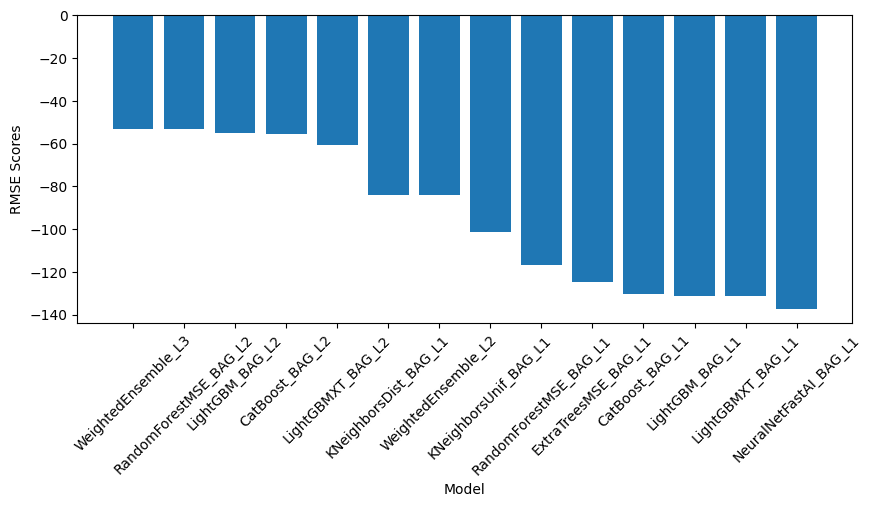

In [20]:
# Output the model's `score_val` in a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.bar(leaderboard_df["model"], leaderboard_df["score_val"])
plt.xlabel("Model")
plt.ylabel("RMSE Scores")
plt.xticks(rotation=45)
plt.show()

### Create predictions from test dataset

In [21]:
predictions = predictor.predict(test)
predictions.head()

0    23.725388
1    42.563408
2    46.238922
3    49.296471
4    52.210075
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [22]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.939087
std        89.913223
min         2.710618
25%        20.372715
50%        65.278442
75%       166.208252
max       365.330536
Name: count, dtype: float64

In [23]:
# How many negative values do we have?
negative_pred_count = (predictions < 0).sum()
pred_pos_count = (negative_pred_count == 0).sum()*6493
pred_neg_count = (negative_pred_count == 1).sum()

print("Total predictions                :", len(predictions.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)


Total predictions                : 6493
Total positive prediction values : 6493
Total negative prediction values : 0


In [24]:
# Set them to zero
predictions[predictions<0] = 0    # (In case, if negative values exist in the predictions, set them to 0)


negative_pred_count = (predictions < 0).sum()
pred_pos_count = (negative_pred_count == 0).sum()*6493
pred_neg_count = (negative_pred_count == 1).sum()

print("Total predictions                :", len(predictions.index))
print("Total positive prediction values :", pred_pos_count)
print("Total negative prediction values :", pred_neg_count)


Total predictions                : 6493
Total positive prediction values : 6493
Total negative prediction values : 0


### Set predictions to submission dataframe, save, and submit

In [25]:
Submission["count"] = predictions
Submission.to_csv("submission.csv", index=False)

In [26]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:01<00:00, 105kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [27]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6


fileName                     date                 description                           status    publicScore  privateScore  
---------------------------  -------------------  ------------------------------------  --------  -----------  ------------  
submission.csv               2023-06-07 23:07:46  first raw submission                  complete  1.79035      1.79035       
submission_new_features.csv  2023-06-07 09:31:56  latest submission_new_features model  complete  0.44931      0.44931       
submission_new_hpo.csv       2023-06-07 09:18:52  new features with hyperparameters     complete  0.51677      0.51677       
submission_new_features.csv  2023-06-07 09:16:29  new features                          complete  0.44931      0.44931       


#### Initial score of `?`

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

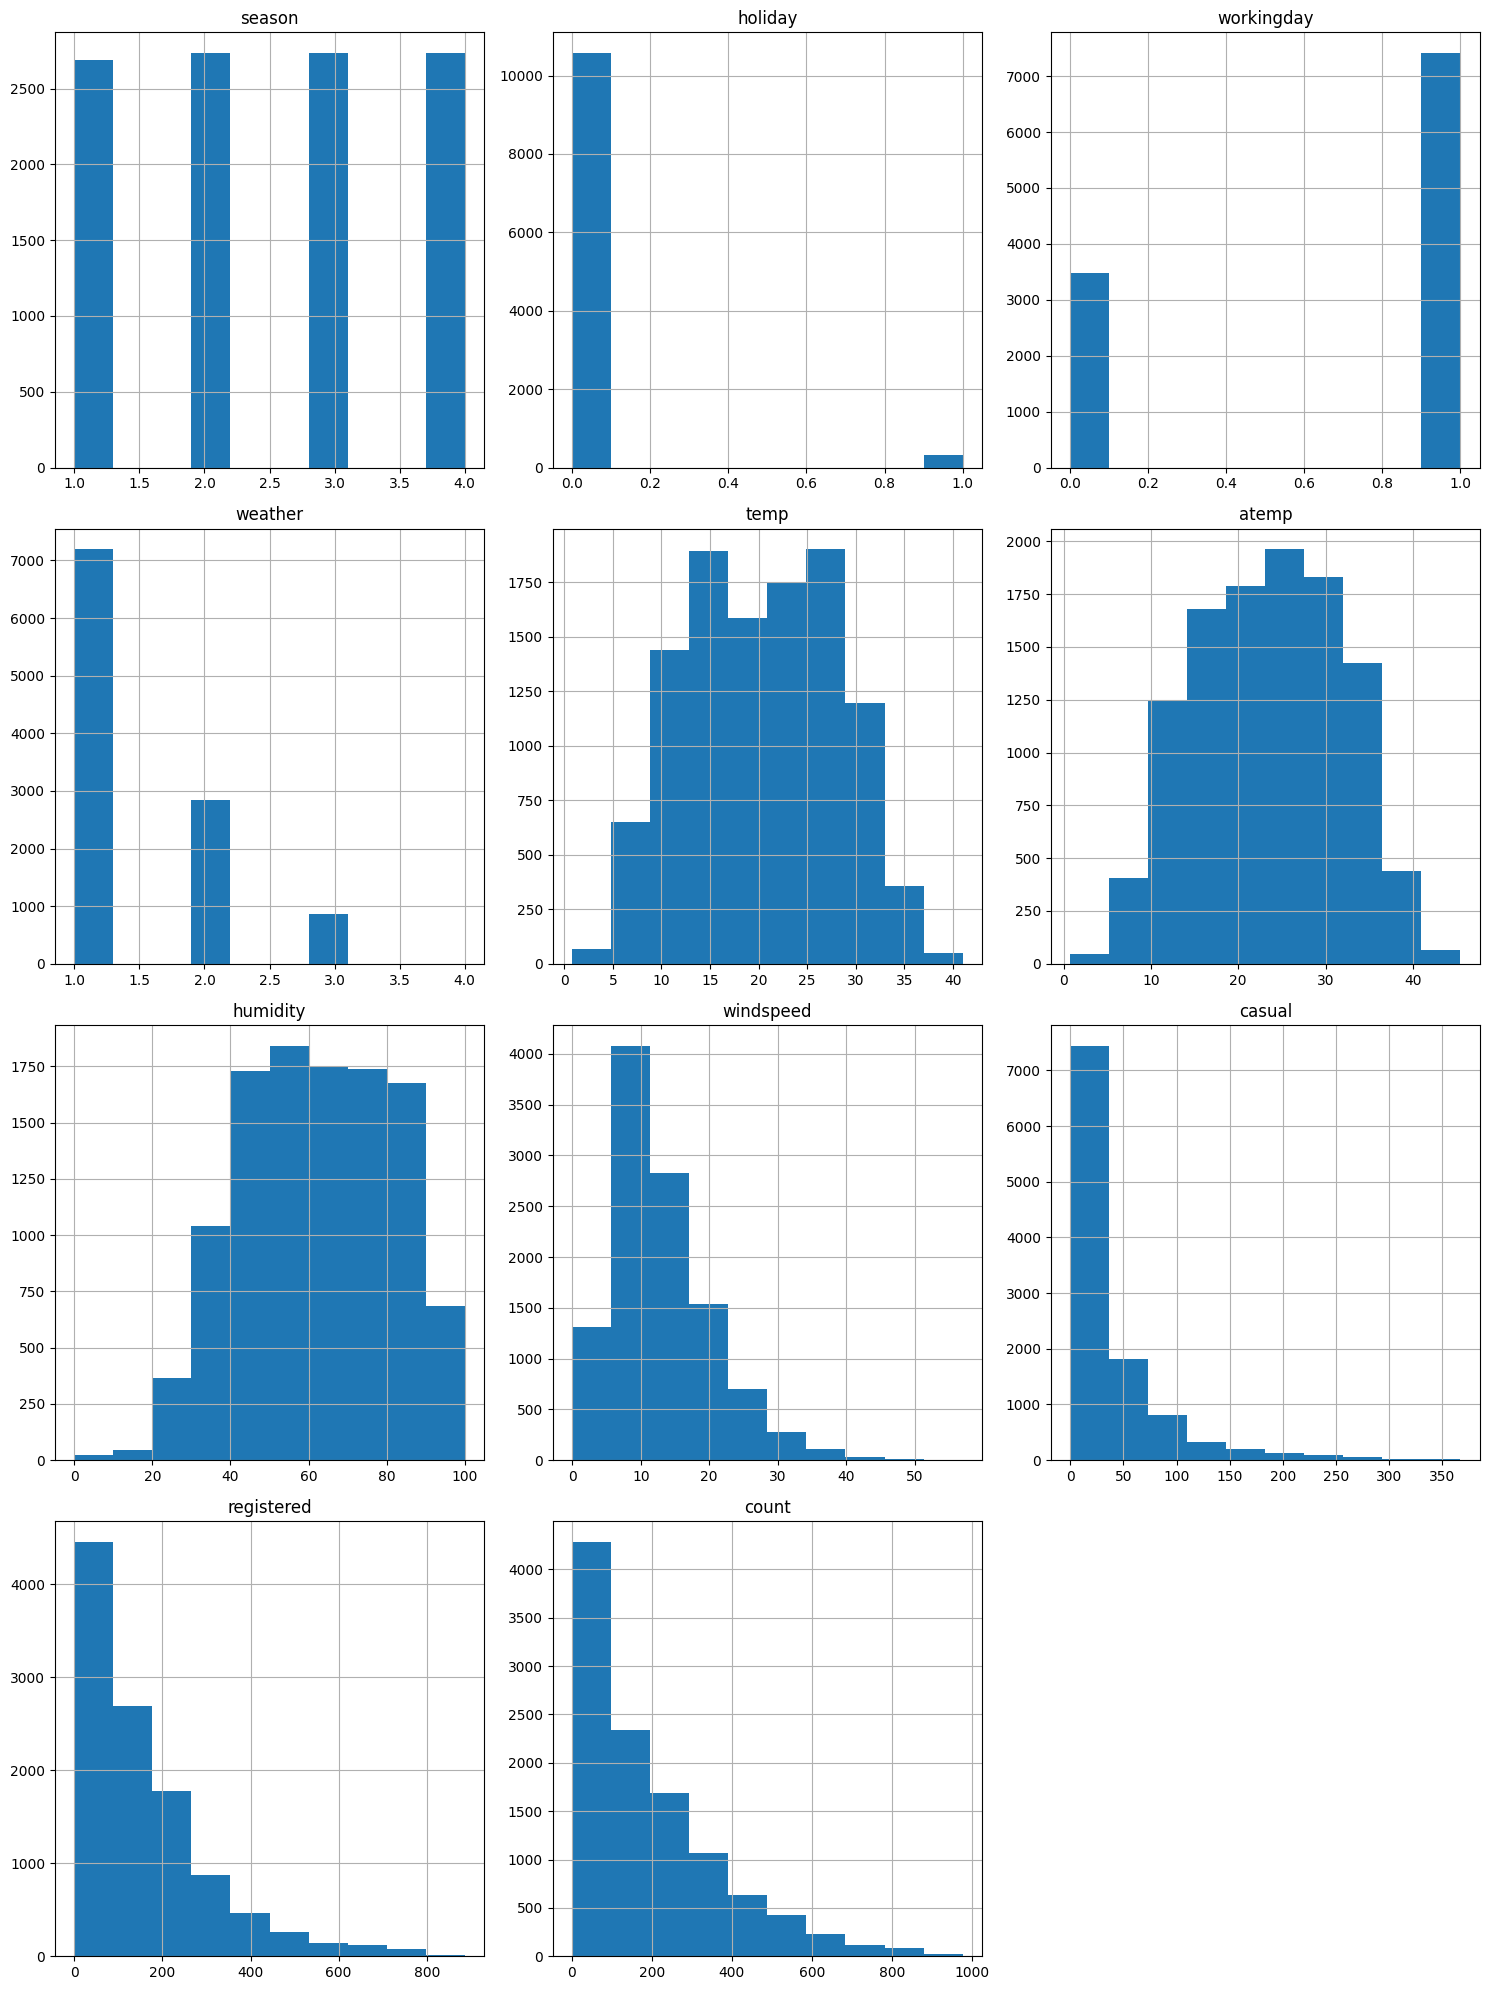

In [28]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,20))  # Note: 'casual' and 'registered' are ignored during training as they are absent in test data

plt.tight_layout()
plt.show()

<ipython-input-29-1b9c752bb9fe>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = corr_data.corr()


<Figure size 1800x1800 with 0 Axes>

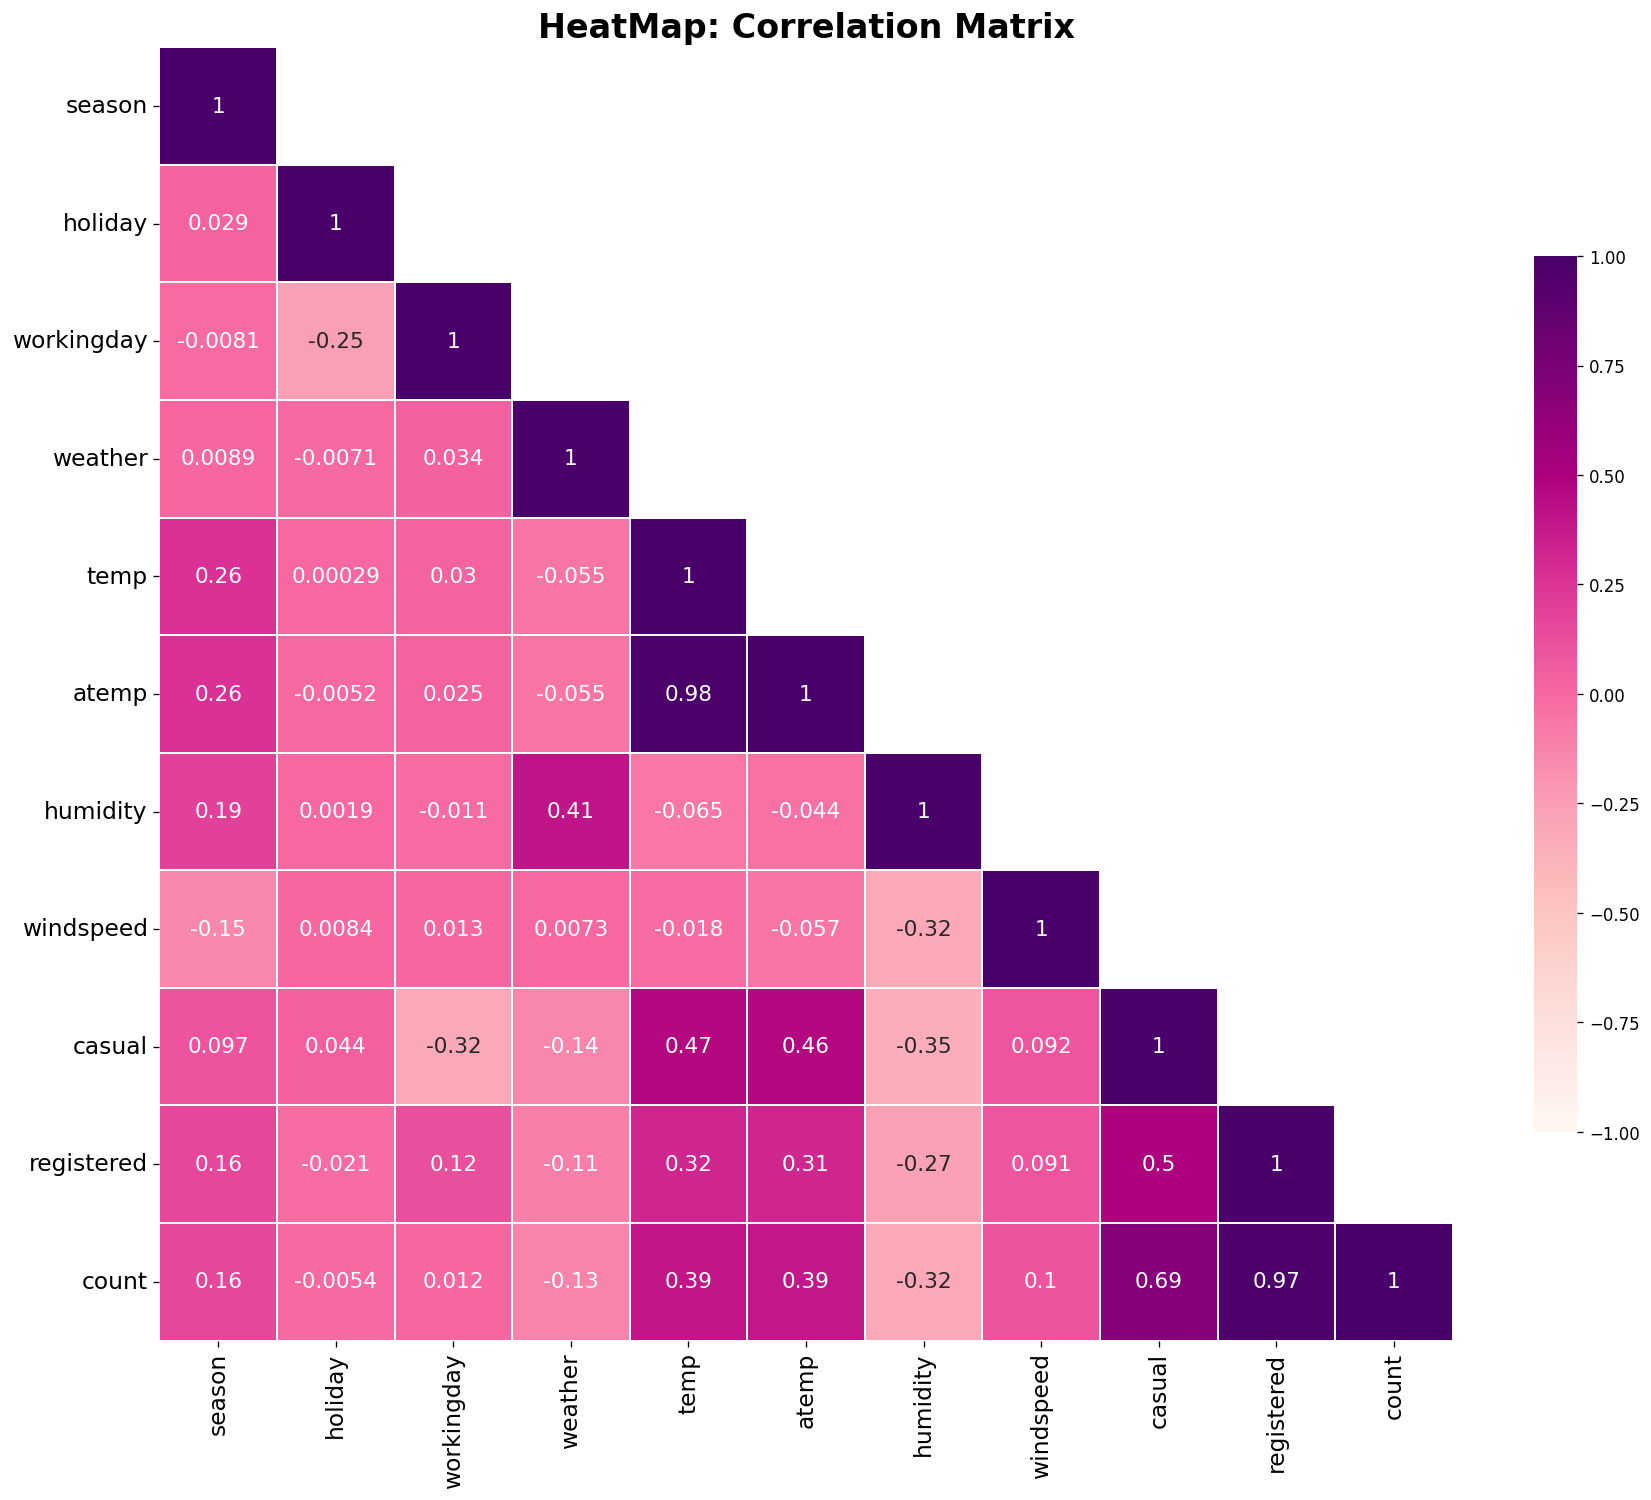

In [29]:
#Plotting a heatmap to understand the correlation between the independent variables
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,15), dpi=120)
corr_data = train.copy()

corr_matrix = corr_data.corr()
f, ax_corr1 = plt.subplots(figsize=(15, 15), dpi=120)
# Create a mask to eliminate redundant repetitive correlations
corr_mask = np.array(corr_matrix)
corr_mask[np.tril_indices_from(corr_mask)] = False

# Plot heatmap using correlation matrix and mask
ax_corr1 = sns.heatmap(corr_matrix, cmap= 'RdPu', cbar_kws={"shrink": .5}, vmin= -1, vmax=1, center=0,
            square=True, mask=corr_mask, annot=True, linewidths=0.01, annot_kws={"size":13})
plt.xticks(fontsize=14, rotation=90)
plt.yticks(fontsize=14, rotation=0)
plt.title("HeatMap: Correlation Matrix", fontsize=20, fontweight='bold')
plt.tight_layout()
plt.autoscale()
plt.show()

In [30]:
# Convert 'datetime' column to datetime format
train["datetime"] = pd.to_datetime(train["datetime"])

# Splitting the 'datetime' feature in train data
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.dayofweek
train["hour"] = train["datetime"].dt.hour

# Dropping the 'datetime' column from the test data
train.drop(["datetime"], axis=1, inplace=True)
train.head()

season  holiday  workingday  weather  temp   atemp  humidity  windspeed  \
0       1        0           0        1  9.84  14.395        81        0.0   
1       1        0           0        1  9.02  13.635        80        0.0   
2       1        0           0        1  9.02  13.635        80        0.0   
3       1        0           0        1  9.84  14.395        75        0.0   
4       1        0           0        1  9.84  14.395        75        0.0   

   casual  registered  count  year  month  day  hour  
0       3          13     16  2011      1    5     0  
1       8          32     40  2011      1    5     1  
2       5          27     32  2011      1    5     2  
3       3          10     13  2011      1    5     3  
4       0           1      1  2011      1    5     4

In [31]:
# Convert 'datetime' column to datetime format
test["datetime"] = pd.to_datetime(test["datetime"])

# Splitting the 'datetime' feature in test data
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.dayofweek  # Note: day -> dayofweek (0->Monday, 6->Sunday)
test["hour"] = test["datetime"].dt.hour

In [32]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  year        10886 non-null  int64  
 12  month       10886 non-null  int64  
 13  day         10886 non-null  int64  
 14  hour        10886 non-null  int64  
dtypes: float64(3), int64(12)
memory usage: 1.2 MB


## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [33]:
# Convert 'int' feature columns that are categorical in nature to 'category' type
train["season"] = train["season"].astype("category")
train["weather"] = train["weather"].astype("category")

test["season"] = test["season"].astype("category")
test["weather"] = test["weather"].astype("category")

In [34]:
# View are new feature
train.head()

season  holiday  workingday weather  temp   atemp  humidity  windspeed  \
0      1        0           0       1  9.84  14.395        81        0.0   
1      1        0           0       1  9.02  13.635        80        0.0   
2      1        0           0       1  9.02  13.635        80        0.0   
3      1        0           0       1  9.84  14.395        75        0.0   
4      1        0           0       1  9.84  14.395        75        0.0   

   casual  registered  count  year  month  day  hour  
0       3          13     16  2011      1    5     0  
1       8          32     40  2011      1    5     1  
2       5          27     32  2011      1    5     2  
3       3          10     13  2011      1    5     3  
4       0           1      1  2011      1    5     4

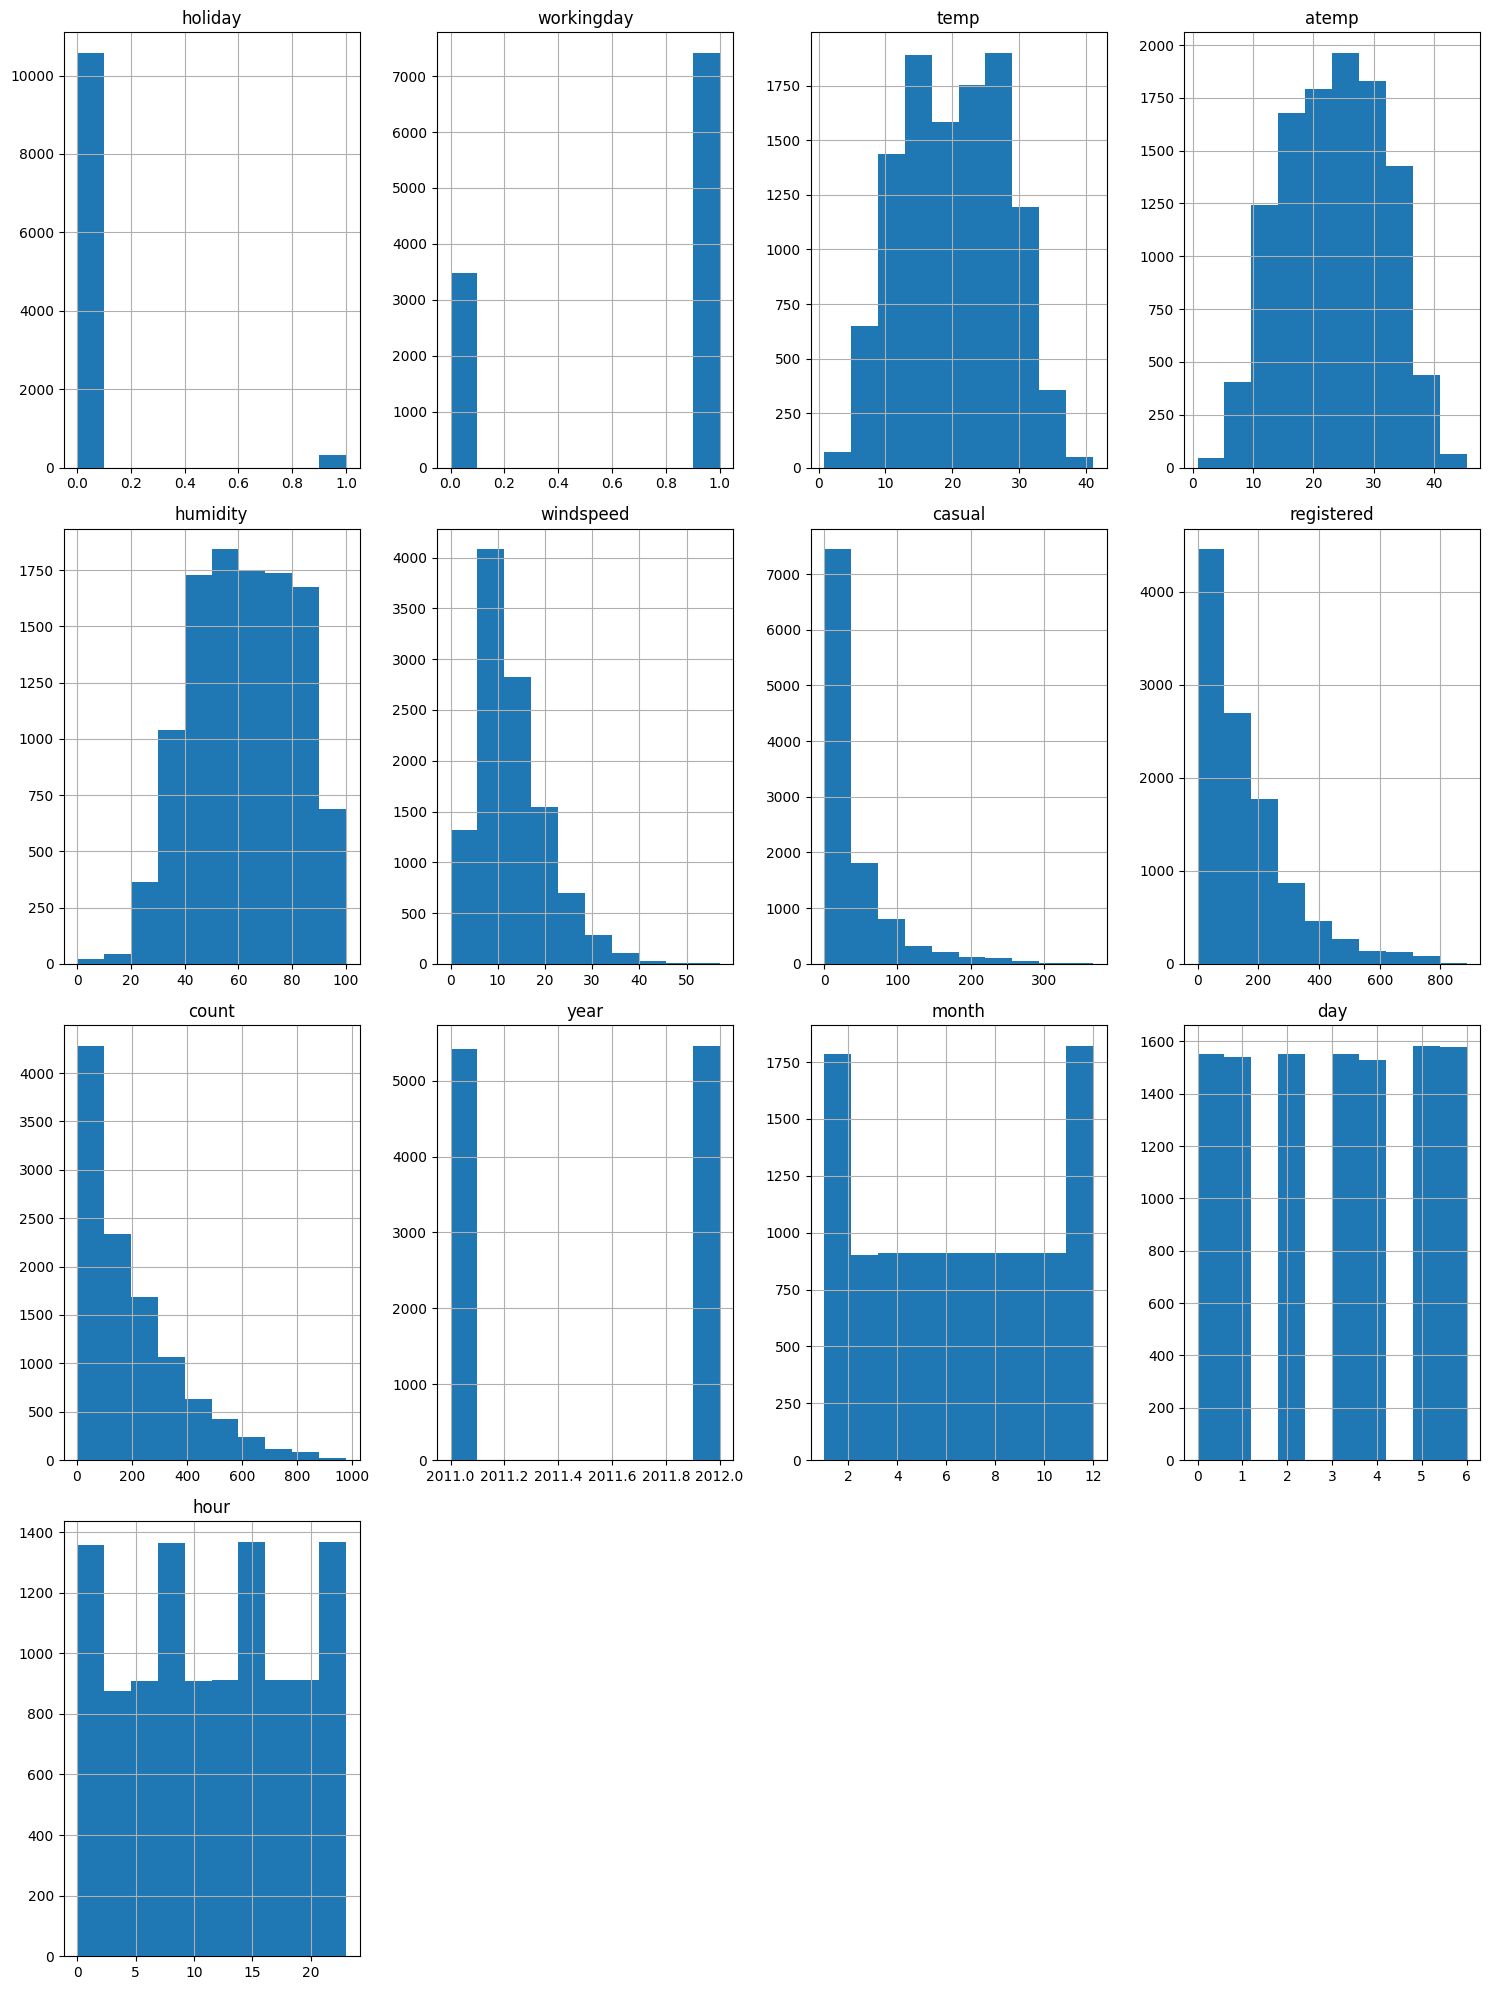

In [35]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15, 20))  # Keyword argument figsize is provided before the positional argument

plt.tight_layout()
plt.show()

## Step 5: Rerun the model with the same settings as before, just with more features

In [36]:
# Requirements: (Same settings as that of initial run) For AutoGluon's Tabular Predictions
eval_metric = 'root_mean_squared_error' 
label = 'count'
ignored_columns = ["casual", "registered"]   # Ignored columns while training
train_data = train                           # 'casual' and 'registered' columns are already dropped/ignored
time_limit = 600                             # 10 minutes -> 60*10 = 600 seconds
presets = "best_quality"  

In [37]:
predictor_new_features = TabularPredictor(label=label, 
                                          problem_type= 'regression',
                                          eval_metric=eval_metric, 
                                          learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                                           train_data = train_data,
                                                                                           time_limit=time_limit,
                                                                                           presets=presets)

No path specified. Models will be saved in: "AutogluonModels/ag-20230607_230757/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230607_230757/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 14
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Dropping user-specified ignored columns: ['casual', 'registered']
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11059.16 MB
	Train Data (Original)  Memory Usage: 0.89 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the featur

In [38]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -33.906382      32.252696  561.017703                0.000735           0.348774            3       True         16
1      WeightedEnsemble_L2  -34.122508      29.213437  358.837983                0.001454           0.297462            2       True          9
2     ExtraTreesMSE_BAG_L2  -34.164361      30.807653  413.262835                0.486297           6.136365            2       True         14
3          CatBoost_BAG_L2  -34.208407      30.424057  462.922762                0.102702          55.796293            2       True         13
4          LightGBM_BAG_L2  -34.544435      30.549168  428.764628                0.227813          21.638159            2       True         11
5   RandomForestMSE_BAG_L2  -34.717046      30.834419  434.603862         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L2': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L2': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -115.73323148534313,
  'KNeighborsDist_BAG_L1': -112.1571124283534

In [39]:
# Leaderboard dataframe
leaderboard_new_features_df = pd.DataFrame(predictor_new_features.leaderboard(silent=True))
leaderboard_new_features_df

model   score_val  pred_time_val    fit_time  \
0      WeightedEnsemble_L3  -33.906382      32.252696  561.017703   
1      WeightedEnsemble_L2  -34.122508      29.213437  358.837983   
2     ExtraTreesMSE_BAG_L2  -34.164361      30.807653  413.262835   
3          CatBoost_BAG_L2  -34.208407      30.424057  462.922762   
4          LightGBM_BAG_L2  -34.544435      30.549168  428.764628   
5   RandomForestMSE_BAG_L2  -34.717046      30.834419  434.603862   
6        LightGBMXT_BAG_L2  -34.932460      30.741987  430.962494   
7          CatBoost_BAG_L1  -35.602073       0.184701  223.086146   
8   NeuralNetFastAI_BAG_L2  -35.791576      30.922086  449.620720   
9          LightGBM_BAG_L1  -35.796869       2.350258   37.839908   
10       LightGBMXT_BAG_L1  -36.459884      25.349580   83.625943   
11    ExtraTreesMSE_BAG_L1  -39.033394       0.755195    6.767745   
12  RandomForestMSE_BAG_L1  -39.587441       0.572248    7.220779   
13  NeuralNetFastAI_BAG_L1  -99.440147       0.802993   48.498573   
14   KNeighborsDist_BAG_L1 -112.157112       0.172714    0.038883   
15   KNeighborsUnif_BAG_L1 -115.733231       0.133666    0.048492   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000735           0.348774            3       True   
1                 0.001454           0.297462            2       True   
2                 0.486297           6.136365            2       True   
3                 0.102702          55.796293            2       True   
4                 0.227813          21.638159            2       True   
5                 0.513064          27.477392            2       True   
6                 0.420632          23.836025            2       True   
7                 0.184701         223.086146            1       True   
8                 0.600730          42.494251            2       True   
9                 2.350258          37.839908            1       True   
10               25.349580          83.625943            1       True   
11                0.755195           6.767745            1       True   
12                0.572248           7.220779            1       True   
13                0.802993          48.498573            1       True   
14                0.172714           0.038883            1       True   
15                0.133666           0.048492            1       True   

    fit_order  
0          16  
1           9  
2          14  
3          13  
4          11  
5          12  
6          10  
7           6  
8          15  
9           4  
10          3  
11          7  
12          5  
13          8  
14          2  
15          1

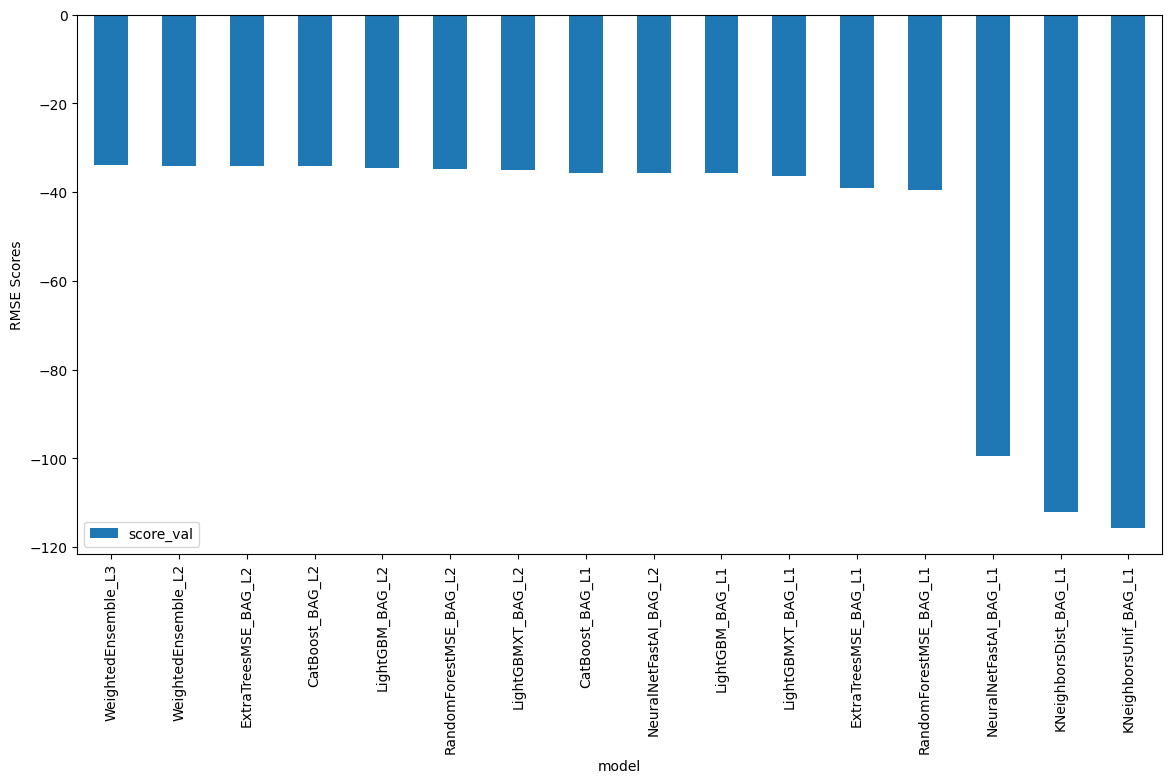

In [40]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_new_features_df.plot(kind="bar", x="model", y="score_val", figsize=(14, 7))
plt.ylabel("RMSE Scores")
plt.show()

In [41]:
predictions_new_features = predictor_new_features.predict(test)
predictions_new_features.head()

0    11.987784
1     6.033758
2     4.073328
3     3.556191
4     3.472824
Name: count, dtype: float32

In [42]:
# Remember to set all negative values to zero
predictions_new_features[predictions_new_features<0] = 0    # (In case, if negative values exist in the predictions_new_features, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_features.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successful")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successful


In [43]:
# Same thing as train and test dataset
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_features.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

In [44]:
# Same submitting predictions
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [45]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:01<00:00, 148kB/s]
Successfully submitted to Bike Sharing Demand

In [46]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                           status    publicScore  privateScore  
---------------------------  -------------------  ------------------------------------  --------  -----------  ------------  
submission_new_features.csv  2023-06-07 23:19:12  new features                          complete  0.44830      0.44830       
submission.csv               2023-06-07 23:07:46  first raw submission                  complete  1.79035      1.79035       
submission_new_features.csv  2023-06-07 09:31:56  latest submission_new_features model  complete  0.44931      0.44931       
submission_new_hpo.csv       2023-06-07 09:18:52  new features with hyperparameters     complete  0.51677      0.51677       


#### New Score of `?`


## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [47]:
import autogluon.core as ag
## From autogluon documentation

nn_options = {'num_epochs': 7, 
              'learning_rate': ag.space.Real(1e-4, 1e-2, default=5e-4, log=True),  
                    # learning rate used in training (real-valued hyperparameter searched on log-scale)
              'activation': ag.space.Categorical('relu', 'softrelu', 'tanh'),  
                    # activation function used in NN (categorical hyperparameter, default = first entry)
              'dropout_prob': ag.space.Real(0.0, 0.5, default=0.1)}

gbm_options = [{'extra_trees': True, 
                'num_boost_round': ag.space.Int(lower=100, upper=500, default=100),
                'num_leaves': ag.space.Int(lower=25, upper=64, default=36),
                'ag_args': {'name_suffix': 'XT'}}, {}, 'GBMLarge']

hyperparameters = {
    'GBM': {
        'model': 'GBM',
        'preprocessing': [
            {'name': 'scale'},
        ],
        # Other GBM hyperparameters...
    },
    'NN_TORCH': {
        'model': 'NN_TORCH',
        'preprocessing': [
            {'name': 'scale'},
        ],
        # Other NN_TORCH hyperparameters...
    },
}

num_trials = 20            # Number of hyperparameter optimization trials you want to perform
search_strategy = 'auto'  # tune hyperparameters using Bayesian optimization routine with a local scheduler
scheduler = 'local'       # Local FIFO scheduler

hyperparameter_tune_kwargs = { 
    'num_trials': num_trials,
    'scheduler' : scheduler,
    'searcher': search_strategy,
}

predictor_new_hpo = TabularPredictor(label='count', problem_type='regression', eval_metric='root_mean_squared_error',
                                    learner_kwargs={'ignored_columns': ignored_columns}).fit(
                                                                         train_data=train, 
                                                                         time_limit=time_limit,
                                                                         presets=presets, 
                                                                         hyperparameters=hyperparameters, 
                                                                         hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
                                                                         refit_full='best')


No model was trained during hyperparameter tuning NeuralNetTorch_BAG_L2... Skipping this model.
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 46.05s of remaining time.
	-35.2562	 = Validation score   (-root_mean_squared_error)
	0.31s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 554.3s ... Best model: "WeightedEnsemble_L2"
Automatically performing refit_full as a post-fit operation (due to `.fit(..., refit_full=True)`
Refitting models via `predictor.refit_full` using all of the data (combined train and validation)...
	Models trained in this way will have the suffix "_FULL" and have NaN validation score.
	This process is not bound by time_limit, but should take less time than the original `predictor.fit` call.
	To learn more, refer to the `.refit_full` method docstring which explains how "_FULL" models differ from normal models.
Fitting 1 L1 models ...
Fitting model

[LightGBM] [Warning] Unknown parameter: scale'}
[LightGBM] [Warning] Unknown parameter: model
[LightGBM] [Warning] Unknown parameter: preprocessing


	1.44s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: LightGBM_BAG_L1/T2_FULL ...


[LightGBM] [Warning] Unknown parameter: scale'}
[LightGBM] [Warning] Unknown parameter: model
[LightGBM] [Warning] Unknown parameter: preprocessing


	0.94s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: LightGBM_BAG_L1/T3_FULL ...


[LightGBM] [Warning] Unknown parameter: scale'}
[LightGBM] [Warning] Unknown parameter: model
[LightGBM] [Warning] Unknown parameter: preprocessing


	1.78s	 = Training   runtime
Fitting 1 L1 models ...
Fitting model: LightGBM_BAG_L1/T4_FULL ...


[LightGBM] [Warning] Unknown parameter: scale'}
[LightGBM] [Warning] Unknown parameter: model
[LightGBM] [Warning] Unknown parameter: preprocessing


	9.53s	 = Training   runtime
Fitting model: WeightedEnsemble_L2_FULL | Skipping fit via cloning parent ...
	0.53s	 = Training   runtime
Refit complete, total runtime = 32.31s
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/ag-20230607_231913/")


In [48]:
# Leaderboard dataframe
leaderboard_new_hpo_df = pd.DataFrame(predictor_new_hpo.leaderboard(silent=True))
leaderboard_new_hpo_df

model  score_val  pred_time_val    fit_time  \
0        WeightedEnsemble_L2 -34.556736       0.001421  227.032801   
1         LightGBM_BAG_L1/T2 -35.177633       0.000132   29.355074   
2         LightGBM_BAG_L1/T4 -35.190431       0.000161  113.301989   
3        WeightedEnsemble_L3 -35.256205       0.001446  279.821942   
4         LightGBM_BAG_L2/T1 -35.331961       0.000623  251.907533   
5         LightGBM_BAG_L2/T3 -35.339863       0.000659  254.109664   
6         LightGBM_BAG_L1/T1 -35.796869       0.000117   39.089895   
7         LightGBM_BAG_L2/T2 -35.931985       0.000655  254.919514   
8         LightGBM_BAG_L1/T3 -36.243585       0.000107   44.759288   
9   WeightedEnsemble_L2_FULL        NaN            NaN   14.206458   
10   LightGBM_BAG_L1/T4_FULL        NaN            NaN    9.525399   
11   LightGBM_BAG_L1/T3_FULL        NaN            NaN    1.779207   
12   LightGBM_BAG_L1/T2_FULL        NaN            NaN    0.936580   
13   LightGBM_BAG_L1/T1_FULL        NaN            NaN    1.438717   

    pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  \
0                 0.000905           0.526555            2       True   
1                 0.000132          29.355074            1       True   
2                 0.000161         113.301989            1       True   
3                 0.000680           0.310991            3       True   
4                 0.000106          25.401287            2       True   
5                 0.000143          27.603418            2       True   
6                 0.000117          39.089895            1       True   
7                 0.000139          28.413268            2       True   
8                 0.000107          44.759288            1       True   
9                      NaN           0.526555            2       True   
10                     NaN           9.525399            1       True   
11                     NaN           1.779207            1       True   
12                     NaN           0.936580            1       True   
13                     NaN           1.438717            1       True   

    fit_order  
0           5  
1           2  
2           4  
3           9  
4           6  
5           8  
6           1  
7           7  
8           3  
9          14  
10         13  
11         12  
12         11  
13         10

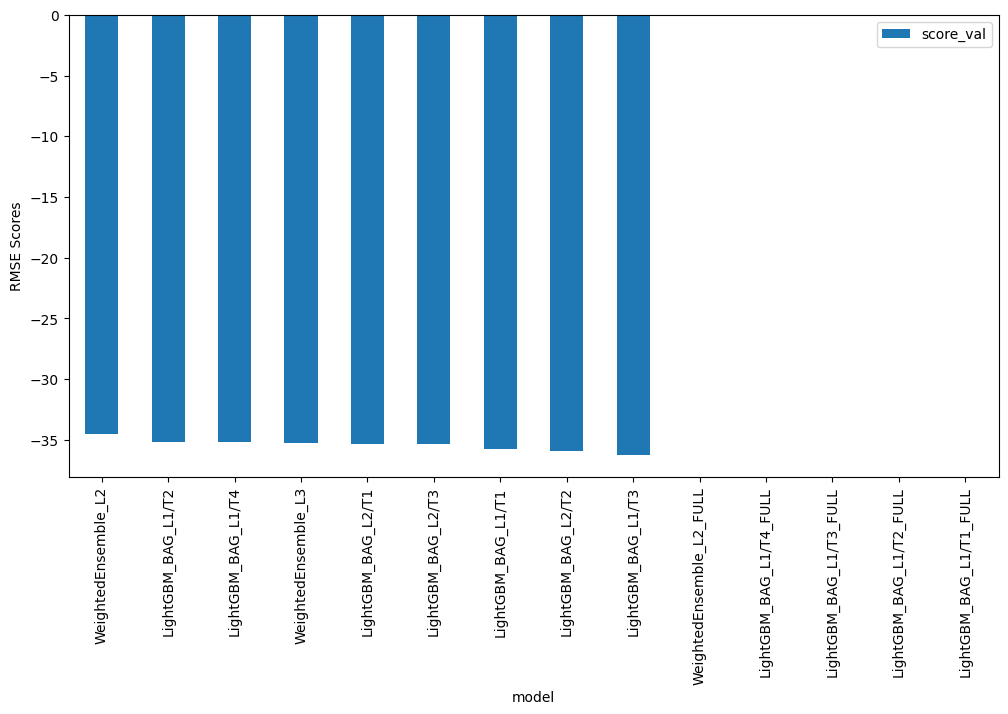

In [49]:
# Output the model's `score_val` in a bar chart to compare performance
import matplotlib.pyplot as plt
leaderboard_new_hpo_df.plot(kind="bar", x="model", y="score_val", figsize=(12, 6))
plt.ylabel("RMSE Scores")
plt.show()

In [50]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                       model  score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0        WeightedEnsemble_L2 -34.556736       0.001421  227.032801                0.000905           0.526555            2       True          5
1         LightGBM_BAG_L1/T2 -35.177633       0.000132   29.355074                0.000132          29.355074            1       True          2
2         LightGBM_BAG_L1/T4 -35.190431       0.000161  113.301989                0.000161         113.301989            1       True          4
3        WeightedEnsemble_L3 -35.256205       0.001446  279.821942                0.000680           0.310991            3       True          9
4         LightGBM_BAG_L2/T1 -35.331961       0.000623  251.907533                0.000106          25.401287            2       True          6
5         LightGBM_BAG_L2/T3 -35.339863       0.000659  254.109664  

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T3': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel',
  'LightGBM_BAG_L1/T1_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T3_FULL': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T4_FULL': 'StackerEnsembleModel_LGB',
  'WeightedEnsemble_L2_FULL': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -35.79686905713535,
  'LightGBM_BAG_L1/T2': -35.17763297930238,
  'LightGBM_BAG_L1/T3': -36.243584990084,
  'LightGBM_BAG_L1/T4': -35.190431073492775,
  'WeightedEnsemble_L2': -34.556735587957

In [51]:
#Create predictions from test dataset
predictions_new_hpo = predictor_new_hpo.predict(test)
predictions_new_hpo.head()

0    17.136337
1     4.174249
2     2.084133
3     1.876646
4     1.787991
Name: count, dtype: float32

In [52]:
# Describe the `predictions_new_hpo` series to see if there are any negative values
predictions_new_hpo.describe()

count    6493.000000
mean      190.122284
std       174.392838
min       -18.525509
25%        45.699707
50%       148.093109
75%       282.587341
max       930.030640
Name: count, dtype: float64

Observations:
Since the minimum value in predictions series is (-16.33
), we do have negative values in the predictions.

In [53]:
# Remember to set all negative values to zero 
predictions_new_hpo[predictions_new_hpo<0] = 0    # (In case, if negative values exist in the predictions_new_hpo, set them to 0)

# Rechecking, if no predictions are less than 0
negative_pred_count = predictions_new_hpo.apply(lambda x: 1 if x<0 else 0)
pred_neg_count = (negative_pred_count==1).sum()
print(f"No. of negative predictions: {pred_neg_count}")
print("All negative values in the predictions (if any) are set to zero successful")

No. of negative predictions: 0
All negative values in the predictions (if any) are set to zero successful


In [54]:
# Same thing as train and test dataset
submission_new_hpo = pd.read_csv('sampleSubmission.csv', parse_dates = ['datetime'])
submission_new_hpo.head()

datetime  count
0 2011-01-20 00:00:00      0
1 2011-01-20 01:00:00      0
2 2011-01-20 02:00:00      0
3 2011-01-20 03:00:00      0
4 2011-01-20 04:00:00      0

In [55]:
# Same submitting predictions
submission_new_hpo["count"] = predictions_new_hpo
submission_new_hpo.to_csv("submission_new_hpo.csv", index=False)

In [56]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100% 188k/188k [00:01<00:00, 134kB/s]
Successfully submitted to Bike Sharing Demand

In [57]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                           status    publicScore  privateScore  
---------------------------  -------------------  ------------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2023-06-07 23:30:07  new features with hyperparameters     pending                              
submission_new_features.csv  2023-06-07 23:19:12  new features                          complete  0.44830      0.44830       
submission.csv               2023-06-07 23:07:46  first raw submission                  complete  1.79035      1.79035       
submission_new_features.csv  2023-06-07 09:31:56  latest submission_new_features model  complete  0.44931      0.44931       


#### New Score of `?`

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

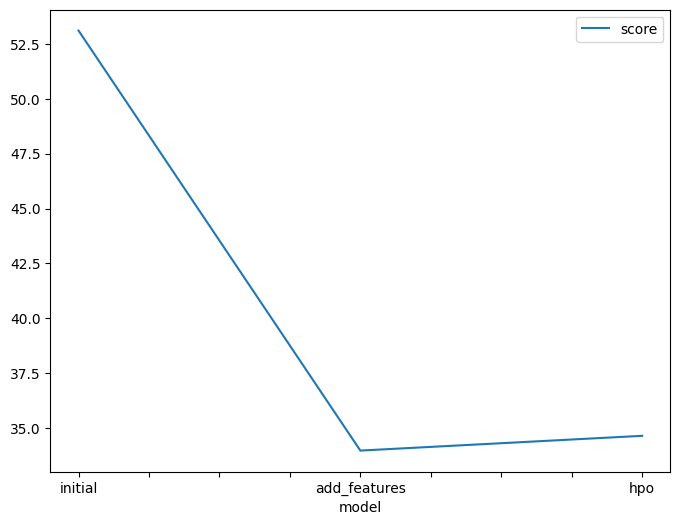

In [58]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [53.0957, 33.988, 34.6594]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

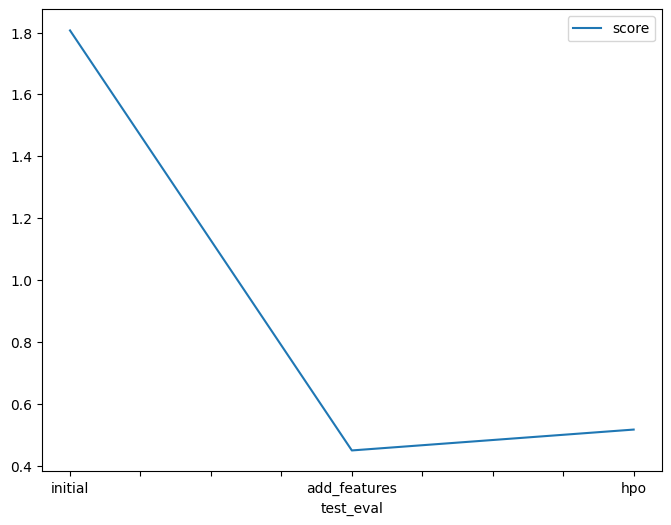

In [59]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80685,   0.44931, 0.51677]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [60]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.DataFrame({
    "model": ["initial", "add_features", "hpo (top-hpo-model: hpo2)"],
    "hpo1": ["prescribed_values", "prescribed_values", "Tree-Based Models: (GBM, XT, XGB & RF)"],
    "hpo2": ["prescribed_values", "prescribed_values", "KNN"],
    "hpo3": ["presets: 'high quality' (auto_stack=True)", "presets: 'high quality' (auto_stack=True)", "presets: 'optimize_for_deployment"],
    "score": [1.80685, 0.44931, 0.51677]
})

model                                    hpo1  \
0                    initial                       prescribed_values   
1               add_features                       prescribed_values   
2  hpo (top-hpo-model: hpo2)  Tree-Based Models: (GBM, XT, XGB & RF)   

                hpo2                                       hpo3    score  
0  prescribed_values  presets: 'high quality' (auto_stack=True)  1.80685  
1  prescribed_values  presets: 'high quality' (auto_stack=True)  0.44931  
2                KNN          presets: 'optimize_for_deployment  0.51677

In [61]:
!pip install nbconvert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [62]:
!jupyter nbconvert --to html "project_template (2).ipynb"

[NbConvertApp] WARNING | pattern 'project_template (2).ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--ex